# Pymaceuticals
## Squamous Cell Carcinoma Study Results
---

### Analysis

- Add your analysis here.

In [19]:
# load dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# instantiate file paths to study data
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

In [20]:
# visualize mouse metadata
mouse_metadata = pd.read_csv(mouse_metadata_path)
print(f'Mouse Metadata has {len(mouse_metadata)} rows.')
mouse_metadata.head(5)

Mouse Metadata has 249 rows.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [21]:
# visualize study results
study_results = pd.read_csv(study_results_path)
print(f'Study Results has {len(study_results)} rows.')
study_results.head(5)

Study Results has 1893 rows.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [22]:
# merge `mouse_metadata` and `study_results` into a single full-study data frame
full_study_frame = pd.merge(mouse_metadata, study_results, on='Mouse ID')
full_study_frame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# display the number of unique `Mouse ID`s to ensure we have 249 mice in the study as expected
len(full_study_frame['Mouse ID'].unique())

249

In [24]:
# identify and display duplicate information based on the subset `Mouse ID` and `Timepoint`
full_study_frame.loc[full_study_frame.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# create a new dataframe without duplicate values
clean_full_study = full_study_frame.loc[~full_study_frame.duplicated(subset=['Mouse ID', 'Timepoint'])]
clean_full_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# there should be no difference in the number of unique `Mouse ID`s we find
len(clean_full_study['Mouse ID'].unique())

249

### Summary Statistics

* The module challenge summary asks for a dataframe including a row for each drug regimen and a column for each of mean, median, variance, standard deviation, and SEM of the tumor volume. Note that this display would not be a useful way to glean information about the potential efficacy of drug regimens over the study period.

* as an alternative, we offer the following data frame as a more useful display of relevant tumor volume summaries. This is, of course, because the purpose of a longitudinal drug regimen study would be to determine changes in tumor volume over time in various treatment groups vs placebo and/or gold standard.

In [27]:
# module-prescribed summary statistics table
tumor_volume_summary_frame = clean_full_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).aggregate(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_summary_frame

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [28]:
# our preferred summary statistics table
tumor_volume_summary_frame = clean_full_study[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']].groupby(['Drug Regimen', 'Timepoint']).aggregate(['mean', 'median', 'var', 'std', 'sem'])
tumor_volume_summary_frame

Tumor Volume (mm3)                                   
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000  \
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

### Simple Visualization with Bar & Pie Charts

#### Bar Charts

[Text(0.5, 0, 'Drug Regimen'), Text(0, 0.5, 'Number of Tests')]

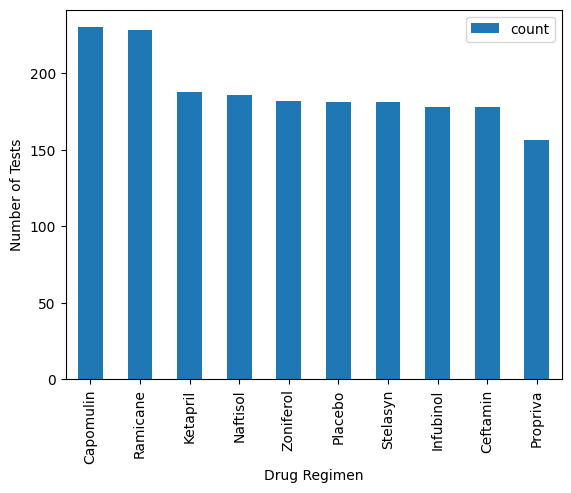

In [29]:
# `pandas` method for generating a bar chart showing the total number of data points within each drug regimen
count_drugs_frame_for_plot = clean_full_study['Drug Regimen'].value_counts().reset_index()
count_plot = count_drugs_frame_for_plot.plot.bar(x='Drug Regimen', y='count')
count_plot.set(xlabel="Drug Regimen", ylabel="Number of Tests")

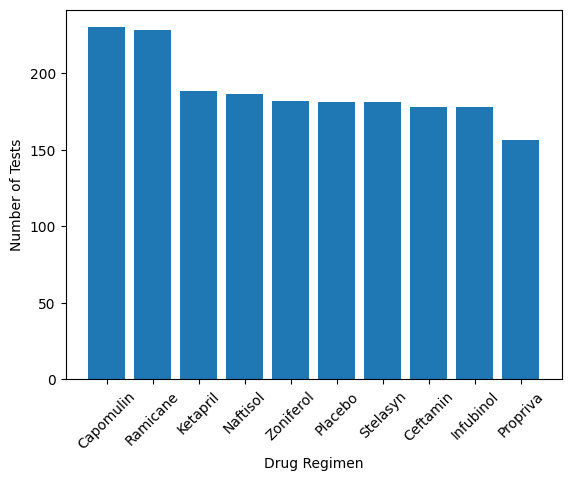

In [30]:
# `matplotlib.pyplot` method for generating a bar chart showing the total number of time points for all mice tested for each drug regimen
count_drugs_frame_for_plot =  clean_full_study[['Drug Regimen']].value_counts().reset_index()
plt.bar(count_drugs_frame_for_plot['Drug Regimen'], count_drugs_frame_for_plot['count'])
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")
plt.show()

#### Pie Charts

<Axes: ylabel='count'>

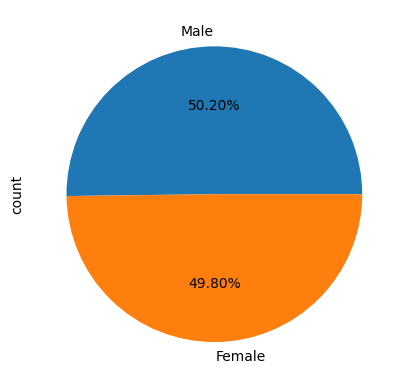

In [31]:
# `pandas` method for generating a pie chart showing the gender breakdown of mice in the study
count_sex_frame_for_plot = mouse_metadata['Sex'].value_counts()
count_sex_frame_for_plot.plot.pie(autopct="%.2f%%")

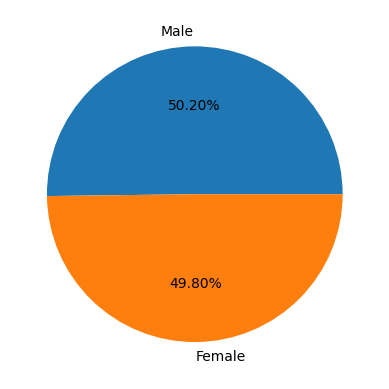

In [32]:
# `matplotlib.pyplot` method for generating a pie chart showing the gender breakdown of mice in the study
count_sex_frame_for_plot = mouse_metadata['Sex'].value_counts().reset_index()
plt.pie(count_sex_frame_for_plot['count'], labels=count_sex_frame_for_plot['Sex'], autopct="%.2f%%")
plt.show()

### Quartiles, Outliers and Box Plot

In [44]:
# calculate the final tumor volume of each mouse across the four most promising treatment regimens
# capomulin, ramicane, infubinol, and ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

### Line and Scatter Plots

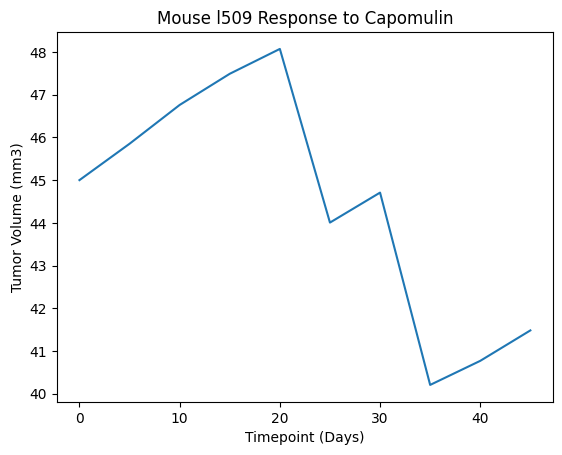

In [43]:
# generate a line plot of tumor volume vs. time point for a particular mouse treated with Capomulin
avg_tumor_vol_cap = clean_full_study.loc[(clean_full_study['Drug Regimen'] == 'Capomulin') & (clean_full_study['Mouse ID'] == 'l509')][['Tumor Volume (mm3)', 'Timepoint']].groupby('Timepoint').mean().reset_index()
plt.plot(avg_tumor_vol_cap['Timepoint'], avg_tumor_vol_cap['Tumor Volume (mm3)'])
plt.title('Mouse l509 Response to Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

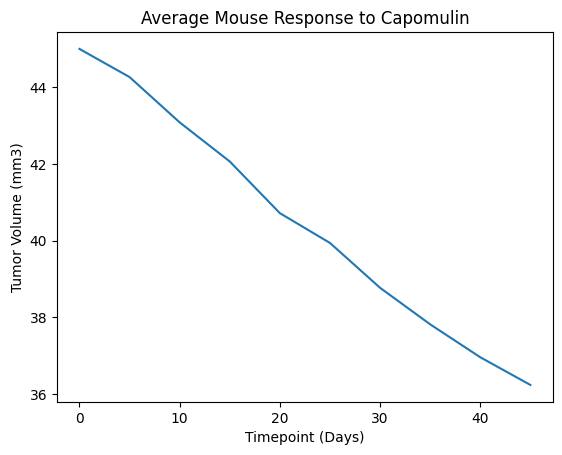

In [34]:
# generate a line plot of tumor volume vs. time point for the average mouse treated with Capomulin
avg_tumor_vol_cap = clean_full_study.loc[clean_full_study['Drug Regimen'] == 'Capomulin'][['Tumor Volume (mm3)', 'Timepoint']].groupby('Timepoint').mean().reset_index()
plt.plot(avg_tumor_vol_cap['Timepoint'], avg_tumor_vol_cap['Tumor Volume (mm3)'])
plt.title('Average Mouse Response to Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

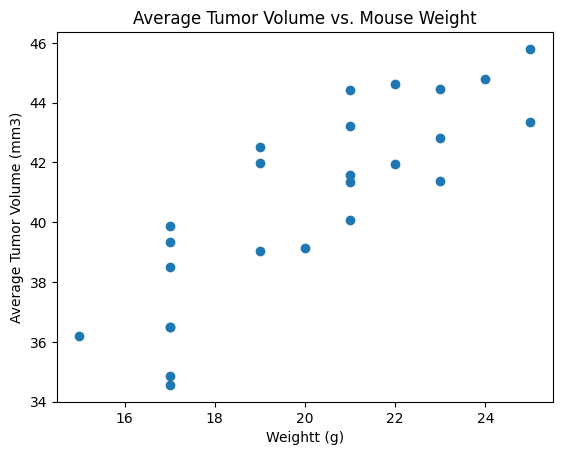

In [35]:
# generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol_by_mouse_weight = clean_full_study.loc[clean_full_study['Drug Regimen'] == 'Capomulin'][['Tumor Volume (mm3)', 'Weight (g)', 'Mouse ID']].groupby(['Mouse ID', 'Weight (g)']).mean().reset_index()

plt.scatter(avg_tumor_vol_by_mouse_weight['Weight (g)'], avg_tumor_vol_by_mouse_weight['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel("Weightt (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

### Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


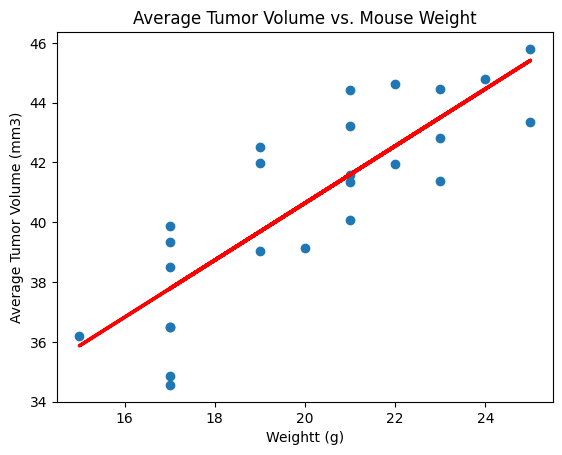

In [39]:
# calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(avg_tumor_vol_by_mouse_weight['Weight (g)'], avg_tumor_vol_by_mouse_weight['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(corr[0], 2)}.')

a, b = np.polyfit(avg_tumor_vol_by_mouse_weight['Weight (g)'], avg_tumor_vol_by_mouse_weight['Tumor Volume (mm3)'], deg=1)

plt.scatter(avg_tumor_vol_by_mouse_weight['Weight (g)'], avg_tumor_vol_by_mouse_weight['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol_by_mouse_weight['Weight (g)'], a * avg_tumor_vol_by_mouse_weight['Weight (g)'] + b, color="r", lw=2.5)
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel("Weightt (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
